In [1]:
from model import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns

In [2]:
features, labels = load_dataset()

Loading dataset...
[OK] Dataset is loaded


In [3]:
pers_resolution = 100
image_size = pers_resolution * pers_resolution
statistical_features = features[:,image_size:]

In [4]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([143,  48], dtype=int64))

In [5]:
alz = np.where(labels == 1 )
healthy = np.where(labels == 0)

In [6]:
entropy_alz = statistical_features[alz,0][0]
entropy_healthy = statistical_features[healthy,0][0]

nb_neurons_alz = statistical_features[alz,1][0]
nb_neurons_healthy = statistical_features[healthy,1][0]

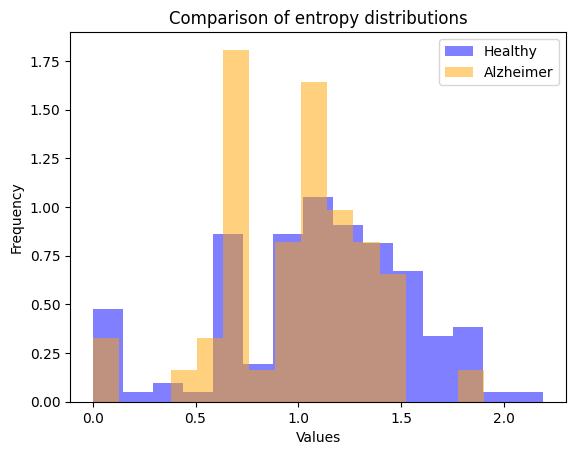

In [7]:
plt.hist(entropy_healthy, bins=15, alpha=0.5, label='Healthy', color='blue', density=True)
plt.hist(entropy_alz, bins=15, alpha=0.5, label='Alzheimer', color='orange',density=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of entropy distributions')

# Add a legend
plt.legend()

# Show the plot
plt.show()

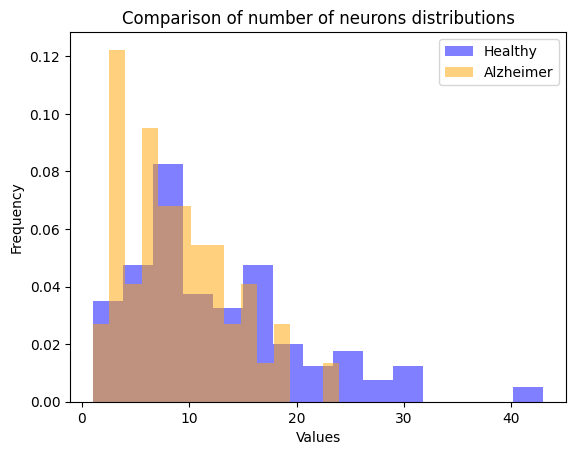

In [8]:
plt.hist(nb_neurons_healthy, bins=15, alpha=0.5, label='Healthy', color='blue',density=True)
plt.hist(nb_neurons_alz, bins=15, alpha=0.5, label='Alzheimer', color='orange',density=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of number of neurons distributions')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
t_statistic, p_value = ttest_ind(entropy_healthy,entropy_alz)
print("Entropies")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Entropies
T-Statistic: 1.684044497805223
P-Value: 0.09382384535074026


In [10]:
t_statistic, p_value = ttest_ind(nb_neurons_healthy,nb_neurons_alz)
print("Number of neurons")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Number of neurons
T-Statistic: 2.8343956671751567
P-Value: 0.005090432085591748


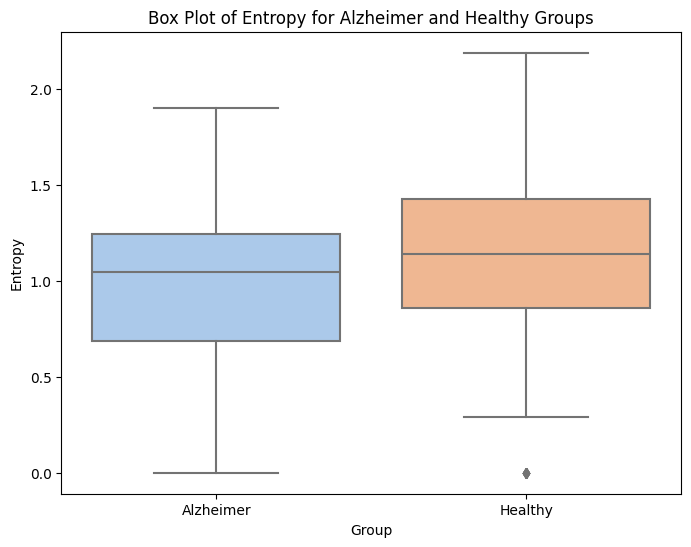

In [11]:
# Create a DataFrame
df = pd.DataFrame({
    'Entropy': np.concatenate([entropy_alz, entropy_healthy]),
    'Group': ['Alzheimer'] * len(entropy_alz) + ['Healthy'] * len(entropy_healthy)
})

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Entropy', data=df, palette='pastel')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Entropy')
plt.title('Box Plot of Entropy for Alzheimer and Healthy Groups')

# Show the plot
plt.show()

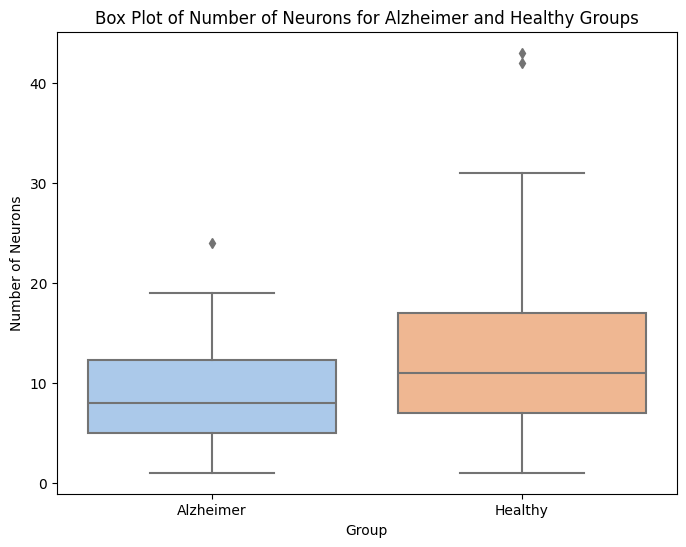

In [12]:
# Create a DataFrame
df_neurons = pd.DataFrame({
    'Number of Neurons': np.concatenate([nb_neurons_alz, nb_neurons_healthy]),
    'Group': ['Alzheimer'] * len(nb_neurons_alz) + ['Healthy'] * len(nb_neurons_healthy)
})

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Number of Neurons', data=df_neurons, palette='pastel')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Neurons')
plt.title('Box Plot of Number of Neurons for Alzheimer and Healthy Groups')

# Show the plot
plt.show()

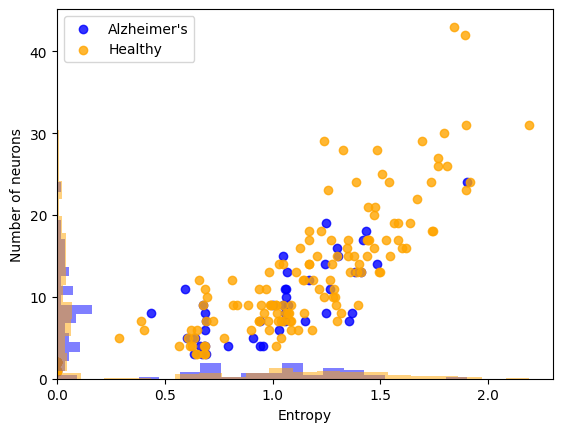

In [13]:
plt.scatter(entropy_alz,nb_neurons_alz,color='blue',alpha=0.8,label="Alzheimer's")
plt.scatter(entropy_healthy,nb_neurons_healthy,color='orange', alpha=0.8, label='Healthy')

# Add histograms for class 1
plt.hist(entropy_alz, bins=20, alpha=0.5, color='blue', density=True)
plt.hist(nb_neurons_alz, bins=20, alpha=0.5, color='blue', density=True, orientation='horizontal')

# Add histograms for class 2
plt.hist(entropy_healthy, bins=20, alpha=0.5, color='orange', density=True)
plt.hist(nb_neurons_healthy, bins=20, alpha=0.5, color='orange', density=True, orientation='horizontal')

plt.xlabel('Entropy')
plt.ylabel('Number of neurons')
plt.legend()